## Final notebook to aggregate results

In [21]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results_path =  "/home/matteo/storage/brain_tuning"

image_contrastive = pd.read_csv(os.path.join(results_path, "results_image_contrastive.csv"))
text_contrastive = pd.read_csv(os.path.join(results_path, "results_text_contrastive.csv"))
multi_contrastive = pd.read_csv(os.path.join(results_path, "results_multi_contrastive.csv"))

image_augmented_contrastive = pd.read_csv(os.path.join(results_path, "results_image_augmented_contrastive.csv"))
text_augmented_contrastive = pd.read_csv(os.path.join(results_path, "results_text_augmented_contrastive.csv"))

image_linear = pd.read_csv(os.path.join(results_path, "results_image_linear.csv"))
text_linear = pd.read_csv(os.path.join(results_path, "results_text_linear.csv"))
multi_linear = pd.read_csv(os.path.join(results_path, "results_multi_linear.csv"))


## load single subject results
single_img_contrastive=[]
for sub in ["CSI1","CSI2","CSI3","CSI4"]:
    single_img_contrastive.append(pd.read_csv(os.path.join(results_path, f"results_image_contrastive_{sub}.csv")))

#concatenate all the results
single_img_contrastive = pd.concat(single_img_contrastive)

## SINGLE SUBJECT AUGMENTED
single_img_augmented_contrastive=[]
for sub in ["CSI1","CSI2","CSI3","CSI4"]:
    single_img_augmented_contrastive.append(pd.read_csv(os.path.join(results_path, f"results_augmented_contrastive_{sub}.csv")))

#concatenate all the results
single_img_augmented_contrastive = pd.concat(single_img_augmented_contrastive)

single_text_contrastive=[]
for sub in ["CSI1","CSI2","CSI3","CSI4"]:
    single_text_contrastive.append(pd.read_csv(os.path.join(results_path, f"results_text_contrastive{sub}.csv")))

#concatenate all the results
single_text_contrastive = pd.concat(single_text_contrastive)

## SINGLE SUBJECT AUGMENTED

single_text_augmented_contrastive=[]
for sub in ["CSI1","CSI2","CSI3","CSI4"]:
    single_text_augmented_contrastive.append(pd.read_csv(os.path.join(results_path, f"results_text_augmented_contrastive{sub}.csv")))

#concatenate all the results
single_text_augmented_contrastive = pd.concat(single_text_augmented_contrastive)



## load for multisubject single


single_multi_contrastive=[]
for sub in ["CSI1","CSI2","CSI3","CSI4"]:
    single_multi_contrastive.append(pd.read_csv(os.path.join(results_path, f"results_multi_contrastive_{sub}.csv")))

#concatenate all the results
single_multi_contrastive = pd.concat(single_multi_contrastive)


In [4]:
# single_img_contrastive

In [5]:
# single_img_augmented_contrastive

In [54]:
# Add a 'model' column to each dataframe
image_contrastive['model'] = 'image_contrastive'
text_contrastive['model'] = 'text_contrastive'
multi_contrastive['model'] = 'multi_contrastive'
image_augmented_contrastive['model'] = 'image_augmented_contrastive'
text_augmented_contrastive['model'] = 'text_augmented_contrastive'
image_linear['model'] = 'image_linear'
text_linear['model'] = 'text_linear'
multi_linear['model'] = 'multi_linear'
single_img_contrastive['model'] = 'single_image_contrastive'
single_img_augmented_contrastive['model'] = 'single_image_augmented_contrastive'
single_text_contrastive['model'] = 'single_text_contrastive'
single_text_augmented_contrastive['model'] = 'single_text_augmented_contrastive'
single_multi_contrastive['model'] = 'single_multi_contrastive'


# Concatenate all dataframes into a single one
df_all = pd.concat([
    image_contrastive,
    text_contrastive,
    multi_contrastive,
    image_augmented_contrastive,
    text_augmented_contrastive,
    image_linear,
    text_linear,
    multi_linear,
    single_img_contrastive,
    single_img_augmented_contrastive,
    single_text_contrastive,
    single_text_augmented_contrastive,
    single_multi_contrastive
], ignore_index=True)

# Compute the average for each model
# Select only numeric columns to average
numeric_cols = df_all.select_dtypes(include=['number','string']).columns
df_mean = df_all.groupby('model')[numeric_cols].mean().reset_index()

df_std = df_all.groupby('model')[numeric_cols].std().reset_index()
df_std.drop(["Unnamed: 0","Subject"], axis=1, inplace=True)
### STD?

df_all.drop("Unnamed: 0", axis=1, inplace=True)
df_all = df_all.sort_values(by="model", ascending=False)

df_mean.drop(["Unnamed: 0","Subject"], axis=1, inplace=True)
df_mean = df_mean.sort_values(by="Top1 Improvement Over Baseline", ascending=False)


model_properties = {
    'image_contrastive': {'model_type': 'cross_subject', 'augmentation': 'False', 'modality': 'image', 'training_objective': 'contrastive'},
    'text_contrastive': {'model_type': 'cross_subject', 'augmentation': 'False', 'modality': 'text', 'training_objective': 'contrastive'},
    'multi_contrastive': {'model_type': 'cross_subject', 'augmentation': 'False', 'modality': 'multi', 'training_objective': 'contrastive'},
    'image_augmented_contrastive': {'model_type': 'cross_subject', 'augmentation': 'True', 'modality': 'image', 'training_objective': 'contrastive'},
    'text_augmented_contrastive': {'model_type': 'cross_subject', 'augmentation': 'True', 'modality': 'text', 'training_objective': 'contrastive'},
    'image_linear': {'model_type': 'single_subject', 'augmentation': 'False', 'modality': 'image', 'training_objective': 'regression'},
    'text_linear': {'model_type': 'single_subject', 'augmentation': 'False', 'modality': 'text', 'training_objective': 'regression'},
    'multi_linear': {'model_type': 'single_subject', 'augmentation': 'False', 'modality': 'multi', 'training_objective': 'regression'},
    'single_image_contrastive': {'model_type': 'single_subject', 'augmentation': 'False', 'modality': 'image', 'training_objective': 'contrastive'},
    'single_image_augmented_contrastive': {'model_type': 'single_subject', 'augmentation': 'True', 'modality': 'image', 'training_objective': 'contrastive'},
    'single_text_contrastive': {'model_type': 'single_subject', 'augmentation': 'False', 'modality': 'text', 'training_objective': 'contrastive'},
    'single_text_augmented_contrastive': {'model_type': 'single_subject', 'augmentation': 'True', 'modality': 'text', 'training_objective': 'contrastive'},
    'single_multi_contrastive': {'model_type': 'single_subject', 'augmentation': 'False', 'modality': 'multi', 'training_objective': 'contrastive'}
}

# Convert the dictionary into a DataFrame
model_properties_df = pd.DataFrame(model_properties).T.reset_index()
model_properties_df.columns = ['model', 'model_type', 'augmentation','modality', 'training_objective']

# Merge the model properties with df_mean
df_mean = df_mean.merge(model_properties_df, on='model', how='left')

df_std = df_std.merge(model_properties_df, on='model', how='left')


target_std = pd.DataFrame()
target_std["model"]= df_std["model"]
target_std["Top1 Improvement Std"]= df_std["Top1 Improvement Over Baseline"]

df_mean = df_mean.merge(target_std, on='model', how='left')

In [34]:
df_mean

,model,Identification Accuracy (%),ID Accuracy Baseline (%),Top-1 Accuracy (%),Top1 Baseline (%),Top1 Improvement Over Baseline,Top-5 Accuracy (%),Top5 Baseline (%),Top5 Improvement Over Baseline,model_type,augmentation,modality,training_objective
0,image_linear,92.207469,50.0,5.506659,0.14859,40.00,18.543382,0.742951,26.40,single_subject,False,image,regression
1,multi_linear,92.251943,50.0,5.177793,0.14859,37.75,18.763010,0.742951,26.85,single_subject,False,multi,regression
2,single_image_augmented_contrastive,89.511385,50.0,4.276413,0.14859,31.50,15.088625,0.742951,21.50,single_subject,True,image,contrastive
3,single_image_contrastive,89.610350,50.0,4.256737,0.14859,31.00,15.164006,0.742951,21.55,single_subject,False,image,contrastive
4,single_multi_contrastive,90.135631,50.0,4.171518,0.14859,30.50,15.690653,0.742951,22.45,single_subject,False,multi,contrastive
5,multi_contrastive,89.113851,50.0,3.898356,0.14859,28.00,14.516112,0.742951,20.70,cross_subject,False,multi,contrastive
6,image_augmented_contrastive,86.723658,50.0,3.442747,0.14859,24.75,11.049346,0.742951,15.85,cross_subject,True,image,contrastive
7,image_contrastive,87.290237,50.0,3.228615,0.14859,23.75,11.654698,0.742951,17.15,cross_subject,False,image,contrastive
8,text_linear,87.248041,50.0,2.551206,0.14859,18.75,10.813365,0.742951,15.65,single_subject,False,text,regression
9,single_text_contrastive,81.702371,50.0,2.212502,0.14859,16.25,8.111398,0.742951,11.80,single_subject,False,text,contrastive


In [10]:
df_mean

,model,Identification Accuracy (%),ID Accuracy Baseline (%),Top-1 Accuracy (%),Top1 Baseline (%),Top1 Improvement Over Baseline,Top-5 Accuracy (%),Top5 Baseline (%),Top5 Improvement Over Baseline,model_type,augmentation,modality,training_objective
0,image_linear,92.207469,50.0,5.506659,0.14859,40.00,18.543382,0.742951,26.40,single_subject,False,image,regression
1,multi_linear,92.251943,50.0,5.177793,0.14859,37.75,18.763010,0.742951,26.85,single_subject,False,multi,regression
2,single_image_augmented_contrastive,89.511385,50.0,4.276413,0.14859,31.50,15.088625,0.742951,21.50,single_subject,True,image,contrastive
3,single_image_contrastive,89.610350,50.0,4.256737,0.14859,31.00,15.164006,0.742951,21.55,single_subject,False,image,contrastive
4,single_multi_contrastive,90.135631,50.0,4.171518,0.14859,30.50,15.690653,0.742951,22.45,single_subject,False,multi,contrastive
5,multi_contrastive,89.113851,50.0,3.898356,0.14859,28.00,14.516112,0.742951,20.70,cross_subject,False,multi,contrastive
6,image_augmented_contrastive,86.723658,50.0,3.442747,0.14859,24.75,11.049346,0.742951,15.85,cross_subject,True,image,contrastive
7,image_contrastive,87.290237,50.0,3.228615,0.14859,23.75,11.654698,0.742951,17.15,cross_subject,False,image,contrastive
8,text_linear,87.248041,50.0,2.551206,0.14859,18.75,10.813365,0.742951,15.65,single_subject,False,text,regression
9,single_text_contrastive,81.702371,50.0,2.212502,0.14859,16.25,8.111398,0.742951,11.80,single_subject,False,text,contrastive


In [57]:
df_mean.to_csv("results.csv")

In [58]:
df = df_mean
model_categories = []
for i in range(len(df)):

    # print(df.iloc[i]["training_objective"])
    # print(df.iloc[i]["model_type"])
    # print(df.iloc[i]["augmentation"])

    if df.iloc[i]["training_objective"]=="regression":
        model_categories.append("Linear")
    elif (df.iloc[i]["training_objective"]=="contrastive") and (df.iloc[i]["model_type"]=="single_subject") and (df.iloc[i]["augmentation"]=="True"):
        model_categories.append("Contrastive Single with Augmentation")

    elif (df.iloc[i]["training_objective"]=="contrastive") and (df.iloc[i]["model_type"]=="single_subject") and (df.iloc[i]["augmentation"]=="False"):
        model_categories.append("Contrastive Single")
    
    elif (df.iloc[i]["training_objective"]=="contrastive") and (df.iloc[i]["model_type"]=="cross_subject") and (df.iloc[i]["augmentation"]=="True"):
        model_categories.append("Contrastive Cross with Augmentation")
    

    elif (df.iloc[i]["training_objective"]=="contrastive") and (df.iloc[i]["model_type"]=="cross_subject") and (df.iloc[i]["augmentation"]=="False"):
        model_categories.append("Contrastive Cross")
        
df["model_category"]=model_categories
    

In [59]:
df.to_csv("results.csv")

In [62]:
df["Top1 Improvement Std"].tolist()

[16.792855623746668,
 15.945218719101975,
 14.200938936093861,
 12.192894105447921,
 12.396235987858036,
 13.140268896284683,
 12.093386622447822,
 9.776672917374976,
 8.05708797684788,
 6.800735254367722,
 5.686240703077327,
 6.551081335677848,
 8.103497187428813]

/tmp/ipykernel_564717/1500846316.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


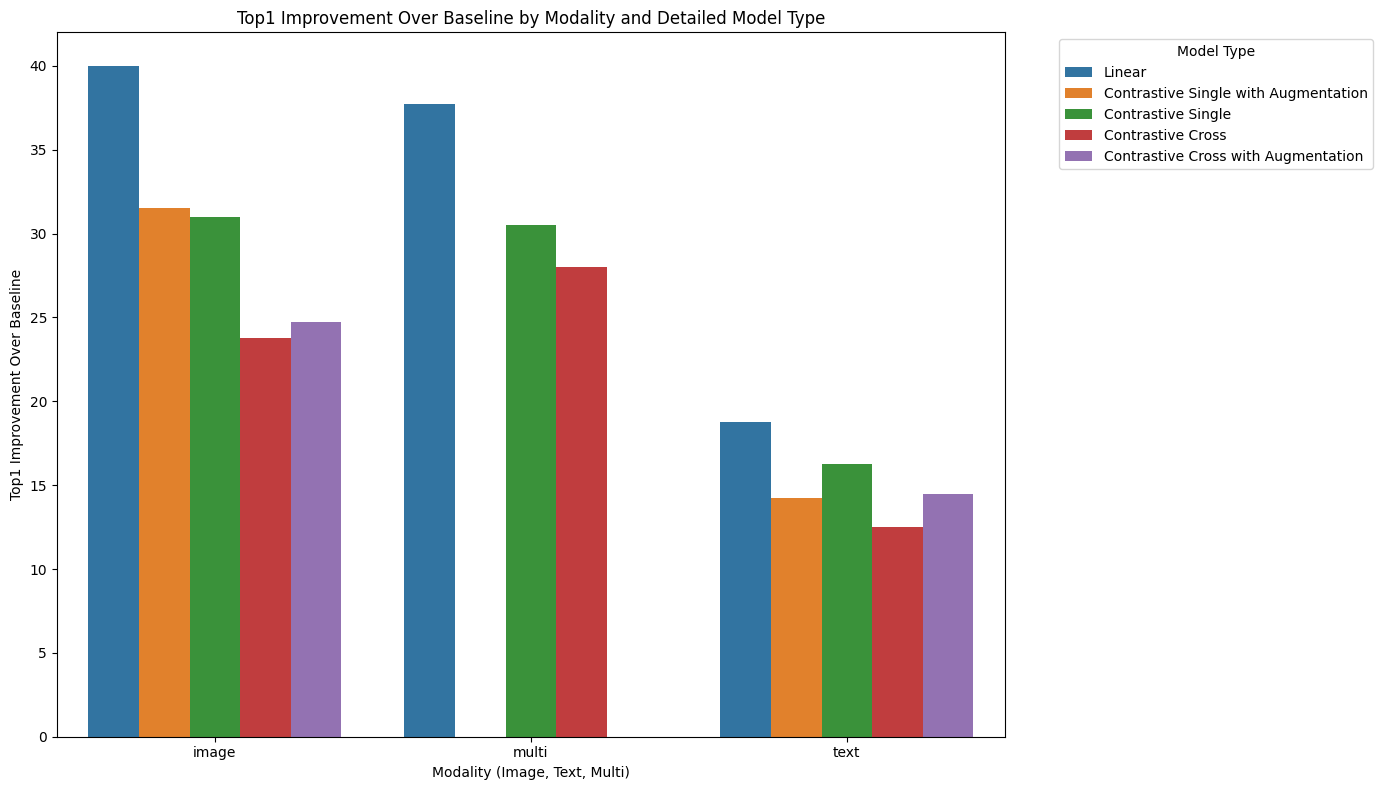

In [82]:

# Plot with refined categories
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,
    x="modality",
    y="Top1 Improvement Over Baseline",
    hue="model_category",
    ci=None,  # Disable seaborn's default CI
)

# Customize plot appearance
plt.title("Top1 Improvement Over Baseline by Modality and Detailed Model Type")
plt.xlabel("Modality (Image, Text, Multi)")
plt.ylabel("Top1 Improvement Over Baseline")
plt.legend(title="Model Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig("results.png")
plt.show()



In [ ]:
len(df_mean)

13

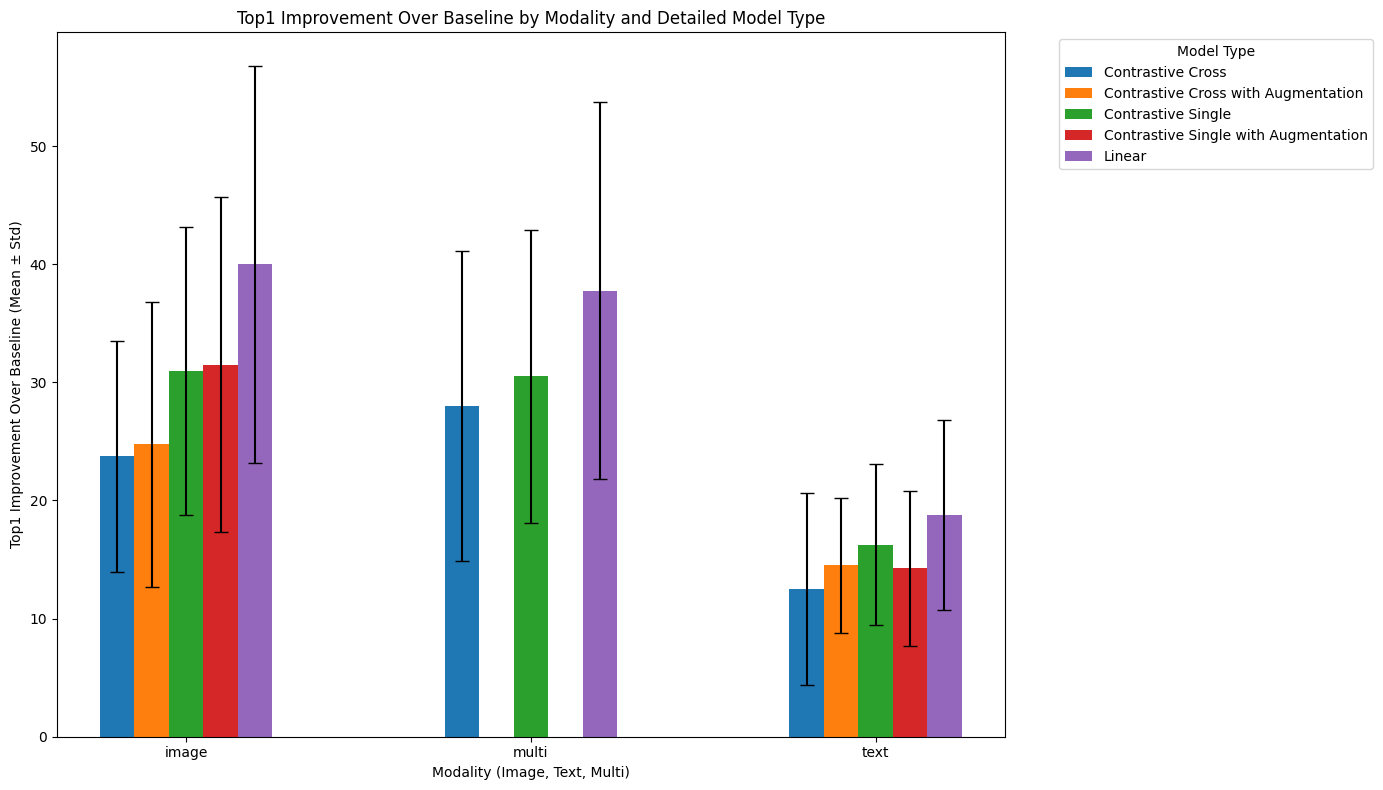

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Create a pivot table for easier plotting with Matplotlib
pivot_df = df_mean.pivot(index="modality", columns="model_category", values=["Top1 Improvement Over Baseline", "Top1 Improvement Std"])

# Set up the plot dimensions and positions
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
modality_labels = pivot_df.index
x = 2*np.arange(len(modality_labels))

# Loop through each category and plot it with custom error bars
for i, category in enumerate(pivot_df.columns.levels[1]):
    means = pivot_df[("Top1 Improvement Over Baseline", category)]
    stds = pivot_df[("Top1 Improvement Std", category)]
    
    ax.bar(
        x + i * bar_width,
        means,
        width=bar_width,
        label=category,
        yerr=stds,
        capsize=5  # Adds caps to error bars for better readability
    )

# Customize plot appearance
ax.set_title("Top1 Improvement Over Baseline by Modality and Detailed Model Type")
ax.set_xlabel("Modality (Image, Text, Multi)")
ax.set_ylabel("Top1 Improvement Over Baseline (Mean ± Std)")
ax.set_xticks(x + bar_width * (len(pivot_df.columns.levels[1]) - 1) / 2)
ax.set_xticklabels(modality_labels)
ax.legend(title="Model Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig("results_errorbars.png")

plt.show()
